### Assignment 1

In [1]:
import sys
#!{sys.executable} -m pip install numpy
import os
print("Current working directory: ", os.getcwd())

Current working directory:  /Users/catherineslaughter/Documents/Schoolwork/Fall2022/IML/Assignment1/repo


In [2]:
# Import the necessary libraries/packages here
import numpy as np
import matplotlib.pyplot as plt
# import math

### Helpful Notes:
1. Dataset 1: a linearly separable dataset where you can test the correctness of your base learner and boosting algorithms
   
   300 samples 2 features
   
   ![dataset1.png](./dataset1.png)
   
   Generally speaking, your learners shall 100% correctly classify the data in dataset 1.

2. Dataset 2 ~ 4 : non-linearly separable cases, applying descent boosting techniques can be beneficial
   
   Dataset 2: 300 samples 2 features. In comparison to the performance of your single base learner, does your boosting algorithm perferm better?
      
   ![dataset2.png](./dataset2.png)
      
   Dataset 3: 400 samples 2 features (challenging)

      A good classifier shall obtain a ellipse-like decision boundary on this dataset. Can your algorithms handle this dataset? If not, can you try to give reasonable explanations?

   ![dataset3.png](./dataset3.png)

   Dataset 4: 3000 samples 10 features (more challenging)
   
      This is more or less the higher dimensional version of dataset3. We visualize the first two features of dataset 3, As it is shown in the following figure, they are non-linearly separable. 
      
      How do your algorithms perform?

   ![dataset4.png](./dataset4.png)

   
3. The data is also provided in csv format:
   1. Feature columns and a label column 
   
HINTs: 
1. Split the data into two parts (i.e., training data and test data).
2. Draw decision boundary (surface) of your classifiers (on dataset 1 & 2) can be helpful.
3. Carefully design your experiments so that you can understand the influence of increasing or decreasing some parameters (e.g., learning rate, number of base learners in boosting Alg.)
4. Make smart implementations (e.g., vectorization using numpy to avoid some nested-loops in python), so that you can efficiently run more experiments
5. The performance of your classifiers is not of high priority in this assignment.
   1. The datasets are all artificially generated (toy) data, in principle, there is no need to preprocess the data.
   2. Constructive discussions on your findings are more important. If the results are not good, try to find out the reasons.
   3. We hope this assignment can help you fill in the gap between theory and application.
6. You are encouraged to implement not only Adaboost but also other boosting algorithms of your choice.

In [3]:
""" Load the dataset
Dataset (Numpy npz file)
|- features (Numpy.ndarray)
|- labels (Numpy.ndarray)

The data is also provided in csv format.
"""

def load_data(file_name='./dataset1.npz'):
    """ Load the Numpy npz format dataset 
    Args:
        file_name (string): name and path to the dataset (dataset1.npz, dataset2.npz, dataset3.npz)
    Returns:
        X (Numpy.ndarray): features
        y (Numpy.ndarray): 1D labels
    """
    import numpy as np
    data = np.load(file_name)
    X, y = data['features'], data['labels']
    return X, y

# Load dataset 1 by default
X, y =load_data()
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [12]:
def plot_data(X,y,output, all_learners = np.asarray([]), dataset = 1):
    pos_right = np.empty((1,2))
    pos_wrong = np.empty((1,2))
    neg_right = np.empty((1,2))
    neg_wrong = np.empty((1,2))

    for i in range(y.size-1):
        if y[i] > 0:
            if y[i] == output[i]:
                pos_right = np.append(pos_right, np.reshape(X[i][0:2], (1,2)), axis = 0)
            else:
                pos_wrong = np.append(pos_wrong, np.reshape(X[i][0:2], (1,2)), axis = 0)
        else:
            if y[i] == output[i]:
                neg_right = np.append(neg_right, np.reshape(X[i][0:2], (1,2)), axis = 0)
            else:
                neg_wrong = np.append(neg_wrong, np.reshape(X[i][0:2], (1,2)), axis = 0)

    pos_right = np.delete(pos_right, 0, axis = 0)
    pos_wrong = np.delete(pos_wrong, 0, axis = 0)
    neg_right = np.delete(neg_right, 0, axis = 0)
    neg_wrong = np.delete(neg_wrong, 0, axis = 0)
    

    plt.scatter(pos_right[:,0],pos_right[:,1], c = 'blue', marker = '.', label = '+1, Correct')
    plt.scatter(pos_wrong[:,0],pos_wrong[:,1], c = 'blue', marker = 'x', label = '+1, Inorrect')
    plt.scatter(neg_right[:,0],neg_right[:,1], c = 'green', marker = '.', label = '-1, Correct')
    plt.scatter(neg_wrong[:,0],neg_wrong[:,1], c = 'green', marker = 'x', label = '-1, Inorrect')
    
    
    x_line = np.linspace(X[:,0].min()*1.1, X[:,0].max()*1.1, 100)
    if np.size(all_learners)!=0:
        count = 0
        for learner in all_learners:
            count += 1
            w_x = learner.w[0]
            w_y = learner.w[1]
            
            y_line = (-w_x/w_y)*x_line + learner.b/np.abs(w_y)
            
            plt.plot(x_line,y_line, c = 'grey', linestyle = 'dashed')
        
        plt.title('Ensemble Result with '+str(np.size(all_learners))+' Weak Learners DS'+str(dataset))
    else:
        plt.title('Ensemble Result DS'+str(dataset))
    
    plt.ylim(-2.1,3)
    plt.xlim(x_line[0],x_line[-1])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    pass

def calc_loss(output, y):
    loss = np.sum(output!=y)/output.size
    
    return loss
            

### Skeleton codes:
You should follow the structure of this code:

In [77]:
class Perceptron:
    # Implement your base learner here
    def __init__(self, learning_rate, max_iter, **kwargs):
        """ Initialize the parameters here 
        Args:
            learning_rate (float or a collection of floats): your learning rate
            max_iter (int): the maximum number of training iterations
            Other parameters of your choice

        Examples ToDos:
        self.learning_rate = learning_rate
        self.max_iter = max_iter

        Try different initialization strategies (as required in Question 2.3)
        """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        
        return

    def fit(self, X, y, **kwargs):
        """ Implement the training strategy here
        Args:
            X (Numpy.ndarray, list, etc.): The training data
            y (Numpy.ndarray, list, etc.): The labels
            Other parameters of your choice

        Example ToDos:
        # for _ in range(self.max_iter):
        #     Update the parameters of Perceptron according to the learning rate (self.learning_rate) and data (X, y)
        """ 
        self.w = np.random.rand(X.shape[1], 1)
        #self.w = np.zeros((X.shape[1], 1))  # Initialize the weights to zero
        self.b = 1  # Initialize bias with 1
        self.any_false = True
        self.iter = 0
        
        curr_lr = self.learning_rate
        
        lr_arr = np.ones(1)*curr_lr
        loss_arr = np.ones(1)*calc_loss(self.predict(X),y)
        # Count the number of samples not correctly classified
        while self.any_false and self.iter < self.max_iter:
            #print(curr_lr)
            mis_classified_number = 0
            for i in range(X.shape[0]):
                X_i = X[i]
                y_i = y[i]
                classify_result = np.dot(self.w.T, X_i.T) + self.b
                
                if y_i * classify_result < 0:  # This means sample is misclassified
                    self.w += curr_lr * np.dot(X_i, y_i).reshape(self.w.shape[0], self.w.shape[1])
                    self.b += curr_lr * y_i
                    mis_classified_number += 1
            if mis_classified_number == 0:
                self.any_false = False  # If there isn't any sample misclassified, then the loop will end
            else:
                self.any_false = True  # If there is still any misclassified sample, then the loop kees running
            self.iter += 1
            curr_lr = curr_lr/self.iter
            lr_arr = np.append(lr_arr, curr_lr)
            loss_arr = np.append(loss_arr, calc_loss(self.predict(X),y))
        #print(self.w)
        #print(self.b)
        
        return lr_arr, loss_arr

    def predict(self, x, **kwargs) -> np.ndarray:
        """ Implement the prediction strategy here
        Args:
            x (Numpy.ndarray, list, Numpy.array, etc.): The input data
            Other parameters of your choice
        Return(s):
            The prediction value(s), namely, class label(s), others of your choice
        """ 
        labels = np.zeros(x.shape[0]).astype(int)
        for i, data_point in enumerate(x):
            temp = np.dot(self.w.T, data_point.T) + self.b
            if temp < 0:
                labels[i] = -1
            else:
                labels[i] = 1


        return labels

In [142]:
class BoostingAlgorithm:
    # Implement your boosting algorithm here
    def __init__(self, n_estimators, **kwargs):
        """ Initialize the parameters here 
        Args:
            n_estimators (int): number of base perceptron models
            Other parameters of your choice
        
        Think smartly on how to utilize multiple perceptron models
        """
        self.n_estimators = n_estimators
        self.alpha = np.empty(n_estimators)
        self.learners = np.empty(n_estimators, dtype=object)
        
        pass

    def fit(self, X, y, **kwargs):
        """ Implement the training strategy here
        Args:X (Numpy.ndarray, list, etc.): The training data
            y (Numpy.ndarray, list, etc.): The labels
            Other parameters of your choice
        """ 
        learning_rate = 1 #starts at 1
        max_iter = 200 #maximum iterations
        
        training_data_len = y.size / 2 #can be changed
        
        curr_w = np.ones(y.size)
        curr_w = curr_w/y.size #sum(curr_w) should equal 1
        
        curr_X = X.copy()
        curr_y = y.copy()
        
        
        sort_idx = np.arange(y.size) #creates array of indexes for sorting
        
        for i in range(self.n_estimators):
            self.learners[i] = Perceptron(learning_rate, max_iter)#create current learner
            
            idx_array = np.arange(curr_y.size)
            subset_idx = np.random.choice(idx_array, size=int(training_data_len), replace=False, p=curr_w)
            X_sub, y_sub = curr_X[subset_idx], curr_y[subset_idx]#randomly select subset to train, weighted
            
            self.learners[i].fit(X_sub, y_sub)#train learner
            output = self.learners[i].predict(curr_X) #predict
            
            wrong = np.asarray([int(j) for j in (curr_y != output)])
            
            if sum(wrong) == 0:
                err = np.dot(curr_w, wrong)/.000001 #avoids divide by zero errors
                self.alpha[i] = .5 * np.log((1 - err)/.000001)
            else:
                err = np.dot(curr_w, wrong)/sum(wrong)
                self.alpha[i] = .5 * np.log((1 - err)/err)
            
            update_sign = np.asarray([j if j == 1 else -1 for j in wrong])
            
            new_weights = curr_w * np.exp(update_sign * self.alpha[i])#update weights
            new_weights = new_weights / np.sum(new_weights) #normalize to 1
            
            curr_w = new_weights
        pass   
        #return self.learners

    def predict(self, x, **kwargs):
        """ Implement the prediction strategy here
        Args:
            x (Numpy.ndarray, list, Numpy.array, etc.): The input data
            Other parameters of your choice
        Return(s):
            The prediction value, namely, class label(s)
        """ 
        #print(self.learners)
        pred_sum = 0
        #print("alphas: "+str(self.alpha.size))
        for i, learner in enumerate(self.learners):
            test = learner.predict(x)
            pred_sum += test*self.alpha[i]
        
        pred_avg = pred_sum/self.n_estimators #the weighted average prediction
        
        prediction = np.asarray([-1 if i < 0 else 1 for i in pred_avg])
        
        return prediction

In [7]:
def run(n_estimators = 100, dataset = './dataset1.npz', **kwargs):
    """ Single run of your classifier
    # Load the data
    X, y = load_data()
    # Find a way to split the data into training and test sets
    -> X_train, y_train, X_test, y_test
    
    # Initialize the classifier
    base = Perceptron("your parameters")
    
    # Train the classifier
    base.fit(X_train, y_train, "other parameters")
   
    # Test and score the base learner using the test data
    y_pred = base.predict(X_test, "other parameters")
    score = SCORING(y_pred, y_test)
    """
    
    X, y = load_data(dataset)
    idx_array = np.arange(y.size)
    
    training_size = int(.6*y.size) #number of points to be selected for the training set
    train_idx = np.random.choice(idx_array, size=training_size, replace=False)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = np.delete(np.copy(X), train_idx, axis = 0), np.delete(np.copy(y), train_idx, axis = 0)
    
    strong_learner = BoostingAlgorithm(n_estimators)
    
    strong_learner.fit(X_train, y_train)
    output = strong_learner.predict(X_test)
    
    all_learners = strong_learner.learners
    alphas = strong_learner.alpha
    
    return X_test, y_test, output, all_learners, alphas


In [157]:
n_estimators = 50
dataset = './dataset1.npz'

X, y, output, all_learners, alphas = run(n_estimators, dataset)
print(str(np.sum(output==y))+' out of '+str(output.size)+', '+str((np.sum(output==y)/output.size)*100)+'%')

120 out of 120, 100.0%


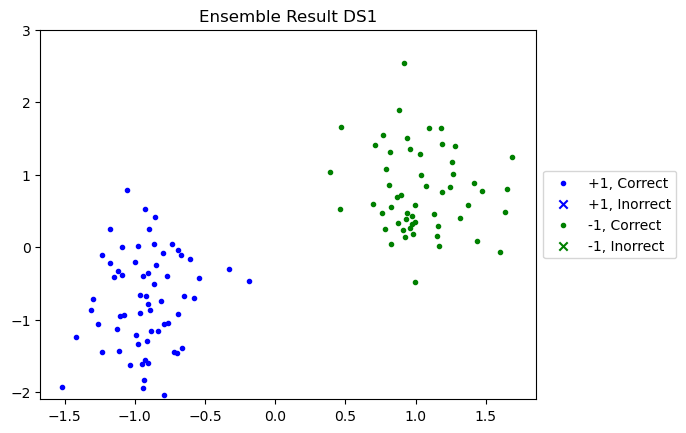

In [159]:
plot_data(X,y,output, dataset=1)

### "How stable is your base algorithm to the choices of learning rate?""

In [106]:
n_estimators = 1
dataset = './dataset1.npz'

X, y, output, all_learners, alphas = run(n_estimators, dataset = './dataset2.npz')

In [107]:
learning_rate = 1 #inital
max_iter = 200

weak_learner = Perceptron(learning_rate, max_iter)

lr_arr2, loss_arr2 = weak_learner.fit(X, y)

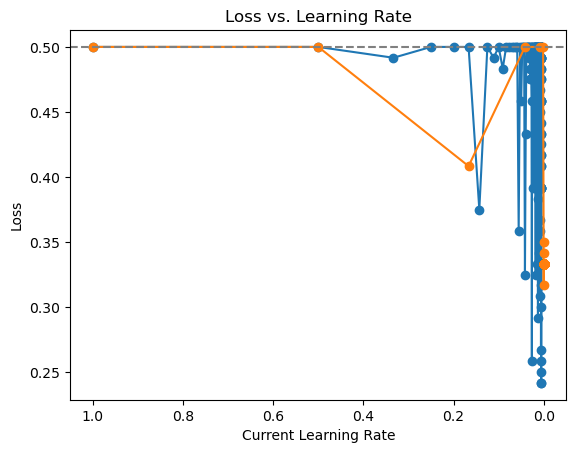

In [111]:
plt.plot(lr_arr1[1:], loss_arr1[1:], marker = 'o', label = 'r(n) = 1/n')
plt.plot(lr_arr2[1:], loss_arr2[1:], marker = 'o', label = 'r(n) = r(n-1)/n')
plt.axhline(.5, c = 'grey',linestyle = 'dashed')
plt.gca().invert_xaxis()
plt.xlabel('Current Learning Rate')
plt.ylabel('Loss')
#plt.ylim([0,1])
plt.title('Loss vs. Learning Rate')
plt.legend
plt.show()

### "How does the sample distribution update rule impact the performance of the ensemble? Hint: show how the performance of the ensemble changes in each iteration."

In [139]:
n_estimators = 100
dataset = './dataset2.npz'

X, y, output, all_learners, alphas = run(n_estimators, dataset)
print(str(np.sum(output==y))+' out of '+str(output.size)+', '+str((np.sum(output==y)/output.size)*100)+'%')

62 out of 120, 51.66666666666667%


In [140]:
num_learners = np.linspace(1,n_estimators+1,10, dtype = int)
losses = np.zeros_like(num_learners, dtype = float)

for idx, num in enumerate(num_learners):
    test_ensemble = BoostingAlgorithm(num)
    test_ensemble.learners = all_learners[0:num]
    test_ensemble.alpha = alphas[0:num]
    output2 = test_ensemble.predict(X)
    
    losses[idx] = calc_loss(output2, y)

losses2 = losses

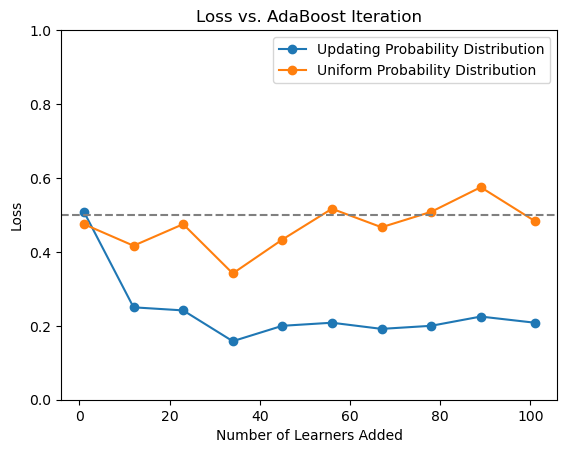

In [144]:
plt.plot(num_learners, losses1, marker = 'o', label = 'Updating Probability Distribution')
plt.plot(num_learners, losses2, marker = 'o', label = 'Uniform Probability Distribution')
plt.axhline(.5, c = 'grey',linestyle = 'dashed')
plt.xlabel('Number of Learners Added')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.title('Loss vs. AdaBoost Iteration')
plt.legend()
plt.show()

### "How does the ensemble compare to the base learner? Is the difference always present, why? Hint: there are 3 2D-datasets present in the testsuite, visualize your final models on both of these."

In [ ]:
dataset = './dataset4.npz'

num_learners = np.asarray([1, 5, 10, 15, 20, 30, 50, 100])
iterations = 15
averages = np.zeros(num_learners.shape)
std_devs = np.zeros(num_learners.shape)

for i, num in enumerate(num_learners):
    losses = np.zeros(iterations)
    avg_loss = 0
    for j in range(iterations):
        X,y,output,all_learners,alphas = run(num, dataset)
        loss = (np.sum(output!=y)/output.size)
        losses[j] = loss
        avg_loss += loss
#     if i == 0:
#         print(losses)
    averages[i] = avg_loss/iterations
    std_devs[i] = np.std(losses)

In [ ]:
plt.errorbar(num_learners, averages, yerr = std_devs, marker = 'o', ecolor='g')
plt.axhline(.5, c = 'grey',linestyle = 'dashed')
plt.xlabel('Number of Learners in Ensemble')
plt.ylabel('Average Loss (Over '+ str(iterations) +' iterations)')
plt.ylim([0,1])
plt.title('Avg. Loss vs. Num. Learners for DS3')
plt.show()

In [ ]:
# fig, ax = plt.subplots(2,1)


# ax[0].errorbar(num_learners, averages, yerr = std_devs, marker = 'o', ecolor='g')
# ax[0].set_ylabel('Average Loss')
# ax[0].set_ylim([-.003,.015])
# ax[0].set_title('Avg. Loss vs. Num. Learners for DS1')

# ax[1].errorbar(num_learners, averages, yerr = std_devs, marker = 'o', ecolor='g')
# ax[1].axhline(.5, c = 'grey',linestyle = 'dashed')
# ax[1].set_xlabel('Number of Learners in Ensemble')
# ax[1].set_ylabel('Average Loss')
# ax[1].set_ylim([-.05,1])

# plt.show()

Good luck with the assignment